<a href="https://colab.research.google.com/github/manm0han/hotel-booking-eda/blob/main/Manmohan_Madhu_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Exploratory Data Analysis on the Hotel Bookings dataset

For this analysis a dataset containing the booking information of two hotels is used. Let's import the required libraries and data into a pandas dataframe called hotel_booking_df.

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing csv file from google drive and storing it in a dataframe.
hotel_booking_df = pd.read_csv('/content/drive/MyDrive/Almabetter/EDA Capstone Project/Copy of Hotel Bookings.csv')

In [ ]:
# Overview of columns.
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking the number of rows and columns in the dataset.
print(f'This dataset contains {hotel_booking_df.shape[0]} rows and {hotel_booking_df.shape[1]} columns.')

This dataset contains 119390 rows and 32 columns.


# Explanation of columns contained in the dataset:


1.   hotel : This dataset contains the data of two hotels. One is a 'Resort Hotel' and the other is a 'City Hotel'. 

2.   is_cancelled : This column contains two values. '0' for did not cancel and '1' for cancelled.

3.   lead_time : Number of days between the customer booking the room and actually arriving.

4.   arrival_date_year : Year of the date the customer arrived.

5.   arrival_date_month : Month of the date the customer arrived.

6.   arrival_date_week_number : Week number of the year the customer arrived.

7.   arrival_date_day_of_month : Day of the date the customer arrived.

8.   stays_in_weekend_nights : Number of days the customer stayed on the weekends.

9.   stays_in_week_nights : Number of days the customer stayed on week nights.

10.  adults : Number of adults per booking.

11.  children : Number of children per booking.

12.  babies : Number of babies per booking.

13.  meal : Type of meal ordered. The categories are
         undefined/SC - no meal package
         BB – Bed & Breakfast
         HB – Half board (breakfast and one other meal – usually dinner)
         FB – Full board (breakfast, lunch and dinner)

14.  country : Nationality of the customer.

15.  market_segment : Specifies the entity which booked the room,
         Direct - By the customer without any third party.
         Corporate - By a company for their employee.
         Online TA - By an online travel agent.
         Offline TA/TO - By an offline travel agent or 
                         a tour operator.
         Complementary - Booked as a gift.
         Groups - Bookings of more than one room per booking.
         Aviation - Airline companies.

16.  distribution_channel : Specifies how the room was booked,
         Corporate - by the company.
         Direct - by an individual.
         TA/TO - by a Travel Agency or Tour Operator.
         GDS - Global Distribution System(corporates use these 
               technology companies for booking for their staff)
                  
17.  is_repeated_guest : Value 1 for repeated guest and 0 for new guests.

18.  previous_cancellations : Number of previous bookings that were cancelled  by the customer prior to the current booking.

19.  previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking.

20.  reserved_room_type : Code of room type reserved.

21.  assigned_room_type : Code for the type of room assigned to the booking.

22.  booking_changes : 	Number of changes/amendments made to the booking from the moment the booking was made until the moment of check-in or cancellation.

23.  deposit_type : Whether the customer gave an advance deposit,
         No Deposit – no deposit was made.
         Non Refund – a deposit was made in the value of the 
         total stay cost.
         Refundable – a deposit was made with a value under 
                      the total cost of stay.

24.  agent : ID of the travel agency that made the booking.

25.  company : ID of the company/entity that made the booking or responsible for paying the booking. 

26.  days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer.

27.  customer_type : Type of customer, assuming one of four categories,
         Contract - arrangement between the hotel and a company
         Group – the customer booked multiple rooms. This is usually done in the case where people come to attend a function or conference.
         Transient – the customer is a walk in or a last minute booking.
         Transient-party – a group of transient customers.

28.  adr : Average Daily Rate, calculated by dividing the sum of all lodging transactions by the total number of staying nights.

29.  required_car_parking_spaces : Number of car parking spaces required by the customer.

30.  total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor).

31.  reservation_status : Reservation last status,
         Canceled – booking was canceled by the customer;
         Check-Out – customer has checked in but 
                     already departed;
         No-Show – customer did not check-in and did 
                   inform the hotel of the reason why

32.  reservation_status_date : Date at which the last status was set.

Purging the dataset of null values.

In [ ]:
# To get an idea of the amount of null values in every column
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Four columns have null values. Columns agent and company seem to have a comparitively higher number of null values. To get an idea of how high this is we can divide by the total number of rows which is 119390.

In [ ]:
hotel_booking_df.shape[0]

119390

In [ ]:
# To find the percentage of null values out of the total number of rows.
hotel_booking_df[['children', 'country', 'agent', 'company']].isnull().sum() / 119390

children    0.000034
country     0.004087
agent       0.136862
company     0.943069
dtype: float64

In the columns children and country only 0.003 % and 0.41 % have null values. This is negligible. Therefore, the corresponding rows can be ignored. However, for the columns agent and company the percentage of null rows is relatively high. Trustworthy insights cannot be obtained in such conditions hence we delete these columns.

In [ ]:
# Deleting two columns and deleting rows which contains null values.
hotel_booking_df = hotel_booking_df.drop(['agent', 'company'], axis = 1)
hotel_booking_df = hotel_booking_df.dropna(axis = 0)

There are also some instances of 'undefined'.

In [ ]:
# Checking which columns have 'Undefined' in them.
(hotel_booking_df == 'Undefined').any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                               True
country                           False
market_segment                    False
distribution_channel               True
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False


We can see that there are two columns which have 'undefined' values, meals and distribution_channel. 'Undefined' in meals suggests that the customer did not opt for any food from the hotel. The code in meals column 'SC' which stands for self catered also means the same. Therefore, we can change 'undefined' to 'SC'.

In [ ]:
hotel_booking_df['meal'].value_counts()

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [ ]:
hotel_booking_df['meal'].replace({'Undefined' : 'SC'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
hotel_booking_df['distribution_channel'].value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

In [ ]:
hotel_booking_df = hotel_booking_df[hotel_booking_df['distribution_channel'].str.contains('Undefined')==False]

Combining the arrival year, month and date columns into one so that it is easy to work with.

In [ ]:
hotel_booking_df['arrival_date_day_of_month'] = hotel_booking_df['arrival_date_day_of_month'].astype(str) + '/' + hotel_booking_df['arrival_date_month'] +  '/' +  hotel_booking_df['arrival_date_year'].astype(str)

In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1/July/2015,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1/July/2015,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1/July/2015,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1/July/2015,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1/July/2015,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_df['arrival_date_day_of_month'] = pd.to_datetime(hotel_booking_df['arrival_date_day_of_month'])

In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,2015-07-01,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,2015-07-01,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,2015-07-01,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,2015-07-01,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,2015-07-01,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking_df.drop(['arrival_date_year', 'arrival_date_month'], axis = 1, inplace = True)

In [ ]:
hotel_booking_df.rename({'arrival_date_day_of_month' : 'arrival_date'}, axis = 1, inplace = True)

In [ ]:
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,27,2015-07-01,0,0,2,0.0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,27,2015-07-01,0,0,2,0.0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,27,2015-07-01,0,1,1,0.0,0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,27,2015-07-01,0,1,1,0.0,0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,27,2015-07-01,0,2,2,0.0,0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Analysis

# 1. What is  the percentage of cancellations ?

In [ ]:
# Determining cancellations per hotel
# 0 is not cancelled and 1 is cancelled
cancellations = hotel_booking_df.groupby(['hotel', 'is_canceled']).size()
pd.DataFrame(cancellations, columns = ['Number of cancellations']).reset_index()

,hotel,is_canceled,Number of cancellations
0,City Hotel,0,46226
1,City Hotel,1,33076
2,Resort Hotel,0,28518
3,Resort Hotel,1,11077


In [ ]:
# Calculating percentage of cancellations and storing it in a dataframe
cancellations_df = pd.DataFrame(data = [['City Hotel', cancellations['City Hotel'][1]/(cancellations['City Hotel'][1]+cancellations['City Hotel'][0])*100],
                                        ['Resort Hotel', cancellations['Resort Hotel'][1]/(cancellations['Resort Hotel'][1]+cancellations['Resort Hotel'][0])*100]], 
                                        columns = ['Hotel', 'Percentage of cancellations'], index = [1,2])
cancellations_df

,Hotel,Percentage of cancellations
1,City Hotel,41.708910
2,Resort Hotel,27.975755


Text(0.5, 1.0, 'Cancellation percentage')

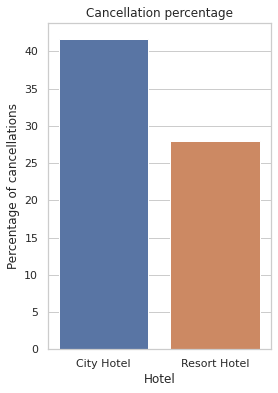

In [ ]:
# Plotting the cancellation percentage
sns.set_theme(style="whitegrid")
plt.subplots(figsize = (4,6))
sns.barplot(data = cancellations_df, x = 'Hotel', y = 'Percentage of cancellations').set_title('Cancellation percentage')

City hotel has a very high number of cancellations. More than one third of people who book the hotel initially cancel later on. This might be because the customer does not have to pay while booking. This means the customer has less motive to stick to the booking. Or it can be because the customer is facing difficulties to pay after booking. Or it can also be because when the customer comes to the hotel to stay he/she might not like the hotel and decides to cancel the booking.

Resort hotels have a lower rate of cancellations than city hotel. This might be because of low bookings in resort hotel for business purposes, which has a high chance of getting rescheduled. But there are less chances for vacations to get rescheduled.

**Inference** : The management has to investigate further and find out the exact reason for the high number of cancellations.

# 2. Which customer types do the hotel attract the most?

In [ ]:
# Finding out the various customer types and their count.
group_customer = pd.DataFrame(data = hotel_booking_df.groupby(['hotel','customer_type']).size()).reset_index()
group_customer.rename(columns = {'hotel' : 'Hotel', 'customer_type' : 'Customer Type', 0 : 'Count'}, inplace = True)
group_customer

,Hotel,Customer Type,Count
0,City Hotel,Contract,2300
1,City Hotel,Group,292
2,City Hotel,Transient,59382
3,City Hotel,Transient-Party,17328
4,Resort Hotel,Contract,1776
5,Resort Hotel,Group,278
6,Resort Hotel,Transient,29791
7,Resort Hotel,Transient-Party,7750


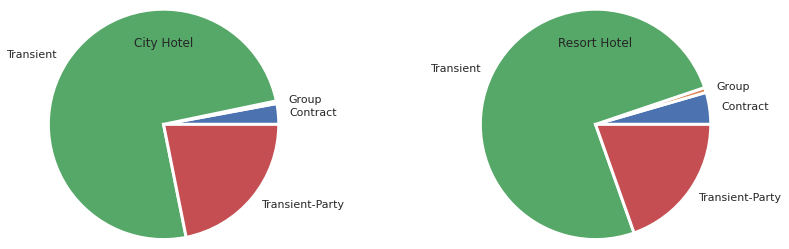

In [ ]:
# Plotting pie charts for the two hotels.
fig = plt.figure()
ax1 = fig.add_axes([0, 1, .5, .5], aspect=1)
ax1.pie(group_customer.loc[group_customer['Hotel'] == 'City Hotel']['Count'], labels = group_customer.loc[group_customer['Hotel'] == 'City Hotel']['Customer Type'],
        radius = 2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2 = fig.add_axes([1, 1, .5, .5], aspect=1)
ax2.pie(group_customer.loc[group_customer['Hotel'] == 'Resort Hotel']['Count'], labels = group_customer.loc[group_customer['Hotel'] == 'Resort Hotel']['Customer Type'],
        radius = 2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.set_title('City Hotel')
ax2.set_title('Resort Hotel')
plt.show()

The above categories mean:

<br>Contract - when the booking has a contract associated to it, for example, between the hotel and a company.
<br>Group – many rooms are booked together.
<br>Transient – the customer is a walk in or a last minute booking.
<br>Transient-party – multiple rooms are booked but by transient guests.

We can see that 'Transient' bookings is much higher than the other categories for both the hotels. From this we can safely say that most of the bookings are not in advance. They are booked spontaneously. This might be an indication of good visibilities of these hotels. These hotels might be situated in strategic locations with respect to travellers. This might also be an indication of the  good online prescence of these hotels.

However, this shows that these hotels have poor tie ups with companies who book accomodation for their employees. These hotels also have poor group bookings. Usually these two types of customers book in advance. But these numbers are comparitively low.

**Inference**: More marketing has to be done with companies which book rooms for their employees and also with customers which attend group events like conferences, etc.

# 3. From which countries the majority of the guests come?

In [ ]:
# Finding the top 5 countries from where guests come.
group_country = pd.DataFrame(data = hotel_booking_df['country'].value_counts().nlargest(5))
group_country.reset_index(inplace = True)
group_country.index = [1,2,3,4,5]
group_country

,index,country
1,PRT,48585
2,GBR,12129
3,FRA,10415
4,ESP,8568
5,DEU,7287


Country codes:-
<br>PRT - Portugal
<br>GBR - Great Britain
<br>FRA - France
<br>ESP - Spain
<br>DEU - Germany

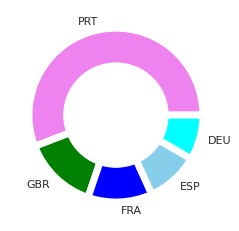

In [ ]:
# Plotting a donut chart to show the number of guests from the top 5 countries.
plt.pie(group_country['country'], labels=group_country['index'], colors=['violet','green','blue','skyblue','cyan'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plot_circle = plt.Circle( (0,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(plot_circle)
plt.show()

From the above graph we can conclude that these hotels have more than half of the guests from Portugal followed by Great Britan. The hotels mentioned in the dataset are hotels situated in Portugal. This means that the local population choose to stay at this hotel. If the local population likes these hotels then the price, food and facilites might be good, as usually the local population know about hotels in their country and will not book if they think the price is too high.

**Inference**: The management has to look into the online presence of this hotel when guests are trying to book from abroad so as to draw in more tourists.

# 4. By what means the guests book their rooms?

In [ ]:
# Grouping the market segment and counting the number of times each segment is used.
group_market_segment = pd.DataFrame(hotel_booking_df.groupby(['market_segment']).size())
group_market_segment.reset_index(inplace = True)
group_market_segment.index = np.arange(1, len(group_market_segment) + 1)
group_market_segment.columns = ['Market Segment', 'Count']
group_market_segment

,Market Segment,Count
1,Aviation,237
2,Complementary,734
3,Corporate,5111
4,Direct,12447
5,Groups,19806
6,Offline TA/TO,24160
7,Online TA,56402


Category definitions:-

<br>Direct - By the customer without any third party.
<br>Corporate - By a company.
<br>Online TA - By an online travel agent.
<br>Offline TA/TO - By an offline travel agent or a tour operator.
<br>Complementary - Booked as a gift.
<br>Groups - Bookings of more than one room.
<br>Aviation - Airline companies.

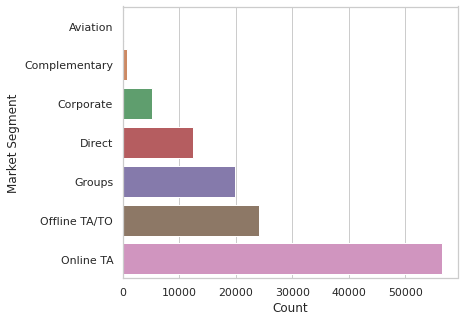

In [ ]:
# Plotting a horizontal bar plot to visualize the market segment.
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(6, 5))
sns.barplot(x='Count', y= 'Market Segment', data=group_market_segment, orient = 'h')

We can see that most of the bookings are done through online travel agents like makemytrip.com. This means that these hotels have a good online presence and good online reviews. However the management can focus on increasing corporate sign ins and aviation contracts. This will also help them to get a continuos revenue. 

# 5. How much time in advance do the customers book their rooms?

In [ ]:
# Finding out the distribution of lead times for both the hotels
group_lead_time = hotel_booking_df.groupby(['hotel', 'lead_time'], as_index = False).size()
lead_time_df = pd.DataFrame(data = group_lead_time)
lead_time_df.rename(columns = {'hotel' : 'Hotel', 'lead_time' : 'Lead Time', 'size' : 'Count'}, inplace = True)
lead_time_df

,Hotel,Lead Time,Count
0,City Hotel,0,3101
1,City Hotel,1,1862
2,City Hotel,2,1129
3,City Hotel,3,1022
4,City Hotel,4,1051
...,...,...,...
860,Resort Hotel,471,6
861,Resort Hotel,532,1
862,Resort Hotel,542,23
863,Resort Hotel,709,1


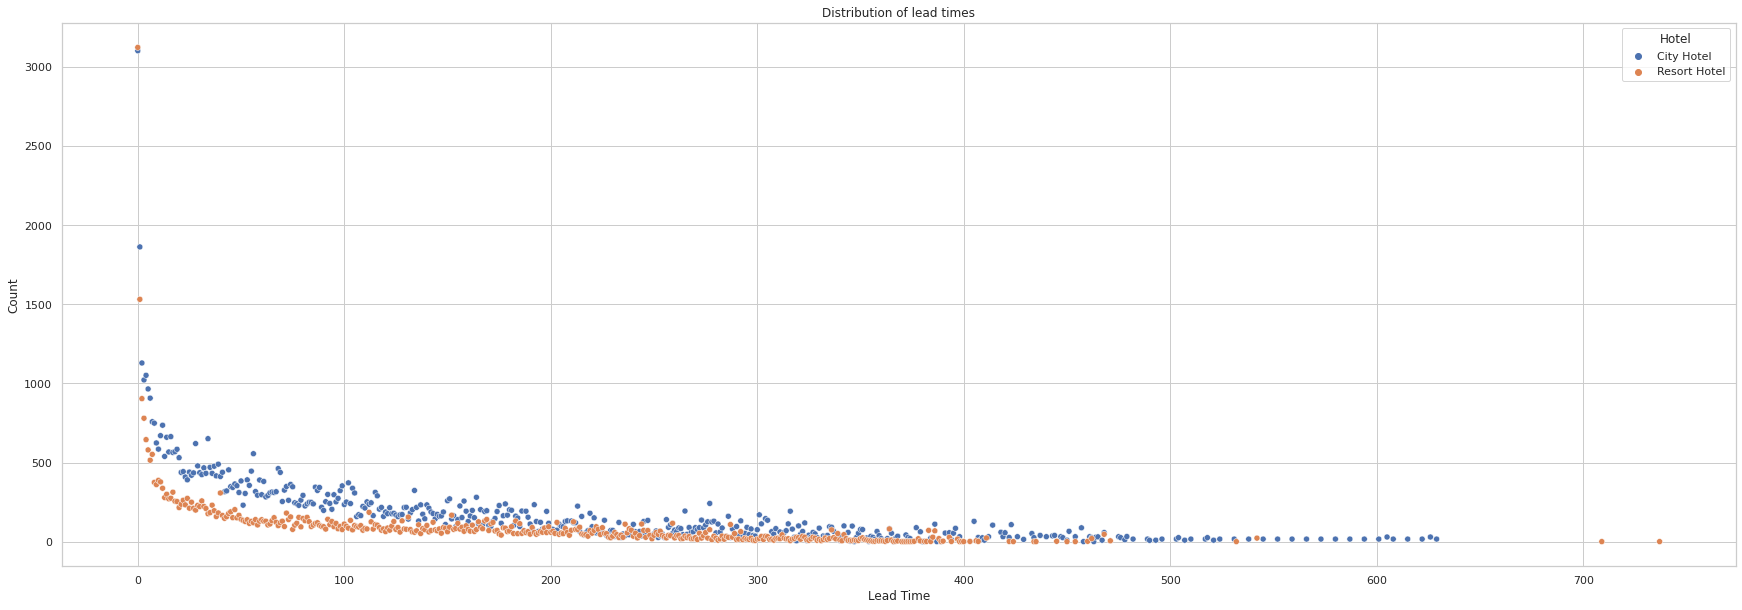

In [ ]:
# Creating a scatterplot to visualize the distribution.
sns.set_theme(style="whitegrid")
plt.subplots(figsize = (30,10))
sns.scatterplot(data = lead_time_df, x = 'Lead Time', y = 'Count', hue = 'Hotel').set_title('Distribution of lead times')
plt.show()

From the above plot we can see that the highest number of bookings were done on the same day as the check in. Both these hotels are booked comparitively close to the check in date. This graph also verifies our findings regarding the 'Transient' customers. Clearly majority of the guests who visit this hotel and spontaneous or last minute booking customers.

In [ ]:
# Days in the waiting list

In [ ]:
# Number of changes or amendments

# References

https://www.sciencedirect.com/science/article/pii/S2352340918315191

https://www.xotels.com/en/glossary/transient